In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
df = pd.read_stata(
    "Mortality_pollution_wind_daily_nonconfidential 1.dta",
    convert_categoricals=False,
    convert_dates=False,
)

Q1 Answer

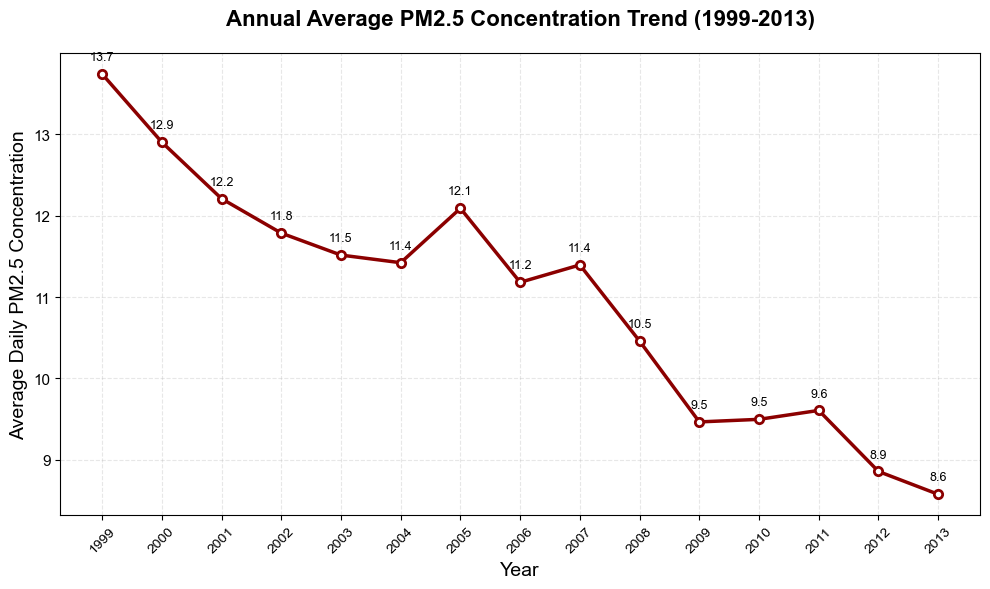

In [6]:
pm25_trend = df.groupby('year')['PM25_conc'].mean().reset_index()
plt.figure(figsize=(10, 6))

plt.plot(pm25_trend['year'], pm25_trend['PM25_conc'], 
         marker='o', markersize=6, linewidth=2.5, 
         color='darkred', markerfacecolor='white', 
         markeredgewidth=2, markeredgecolor='darkred')

for x, y in zip(pm25_trend['year'], pm25_trend['PM25_conc']):
    plt.annotate(f'{y:.1f}', (x, y), textcoords="offset points", 
                 xytext=(0,10), ha='center', fontsize=9)

plt.title('Annual Average PM2.5 Concentration Trend (1999-2013)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Daily PM2.5 Concentration', fontsize=14)

plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)

plt.xticks(pm25_trend['year'], rotation=45)
plt.yticks(fontsize=11)

plt.tight_layout()

plt.show()

In [7]:
pollutants = ['O3_conc', 'CO_conc', 'NO2_conc', 'SO2_conc']
pollutant_trends = df.groupby('year')[pollutants].mean()
print("Annual Average Concentrations of Other Pollutants:")
print(pollutant_trends.round(3))

Annual Average Concentrations of Other Pollutants:
      O3_conc  CO_conc  NO2_conc  SO2_conc
year                                      
1999   31.854  702.038    14.840     4.604
2000   30.053  628.602    13.907     4.332
2001   30.594  596.224    13.791     4.116
2002   30.965  570.371    13.166     3.779
2003   30.174  552.841    12.655     3.777
2004   29.171  501.879    11.834     3.652
2005   30.909  471.221    12.042     3.754
2006   31.211  447.111    11.037     3.216
2007   31.718  400.545    10.485     3.073
2008   30.817  356.030     9.877     2.754
2009   29.208  335.022     8.822     2.188
2010   31.433  329.470     8.530     2.031
2011   31.506  308.132     8.467     1.766
2012   31.665  298.013     7.942     1.452
2013   30.357  269.872     7.680     1.253


Q2 Answer

1. Trend of Counties Without Pollution Records (1999-2013)
High in early years (1999-2005) → gradual decline (monitoring expansion) → late-stage low non-zero levels.
2. Key Empirical Issues
Sample bias: Early urban/industrial focus (no rural data) → unrepresentative results.
Unreliable cross-year comparisons: Shifting county composition distorts true trends.
Weak statistical power: Small early samples fail to detect significant effects.
Monitoring expansion confounding: Blurs real impacts of policies/economy.

/var/folders/5b/f6smv81545z3_dl1mdjz59k80000gn/T/ipykernel_70686/3424581784.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  county_pollutant_missing = df.groupby(['year_month', 'county_fips']).apply(
/var/folders/5b/f6smv81545z3_dl1mdjz59k80000gn/T/ipykernel_70686/3424581784.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_counties_all_poll = county_pollutant_missing.groupby('year_month').app

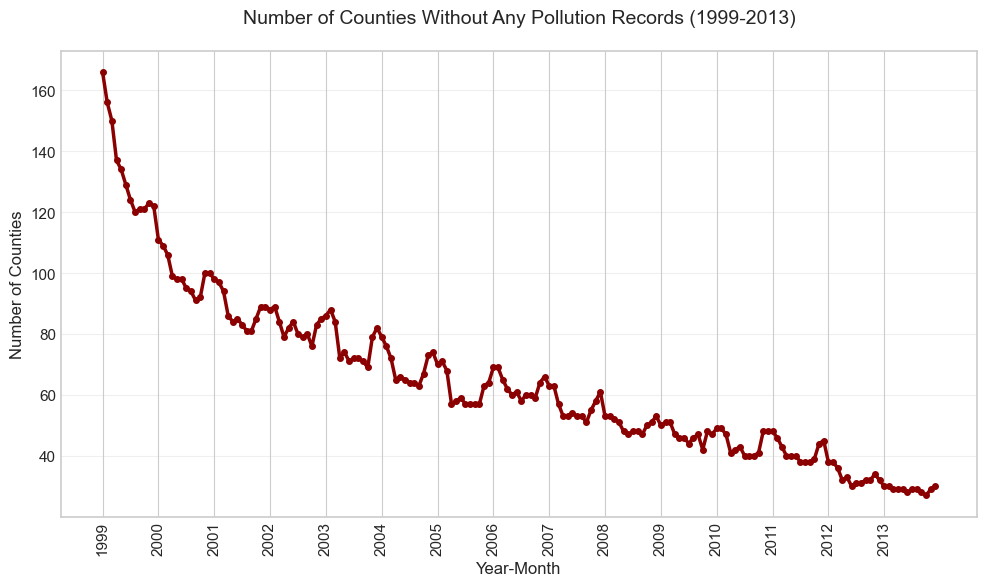

In [9]:
pollutant_vars = ['PM25_conc', 'O3_conc', 'CO_conc', 'NO2_conc', 'SO2_conc']
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

county_pollutant_missing = df.groupby(['year_month', 'county_fips']).apply(
    lambda x: x[pollutant_vars].isna().all().all()  
).reset_index(name='all_pollutants_missing')

missing_counties_all_poll = county_pollutant_missing.groupby('year_month').apply(
    lambda x: x[x['all_pollutants_missing']]['county_fips'].nunique()
).reset_index(name='missing_county_count')

plt.plot(
    missing_counties_all_poll['year_month'], 
    missing_counties_all_poll['missing_county_count'], 
    color='darkred', 
    linewidth=2.5, 
    marker='o', 
    markersize=4
)

plt.title('Number of Counties Without Any Pollution Records (1999-2013)', fontsize=14, pad=20)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of Counties', fontsize=12)
plt.xticks(
    rotation=90, 
    ticks=missing_counties_all_poll['year_month'][::12],
    labels=[date.split('-')[0] for date in missing_counties_all_poll['year_month'][::12]]  # Label ticks with just the year
)
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('Q2_missing_counties_all_pollutants.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
print(f"Peak number of counties with no pollution records: {missing_counties_all_poll['missing_county_count'].max()} (in {missing_counties_all_poll.loc[missing_counties_all_poll['missing_county_count'].idxmax(), 'year_month']})")
print(f"Trough number of counties with no pollution records: {missing_counties_all_poll['missing_county_count'].min()} (in {missing_counties_all_poll.loc[missing_counties_all_poll['missing_county_count'].idxmin(), 'year_month']})")
print(f"Percent reduction in missing counties (peak to trough): {round((1 - missing_counties_all_poll['missing_county_count'].min()/missing_counties_all_poll['missing_county_count'].max())*100, 2)}%")

Peak number of counties with no pollution records: 166 (in 1999-01)
Trough number of counties with no pollution records: 27 (in 2013-10)
Percent reduction in missing counties (peak to trough): 83.73%


Q3 Answer

1. Mean daily PM2.5 concentration: 10.629 μg/m³.
2. It measures the variability of each variable around its mean, reflecting the spread of daily values.

In [13]:
summary_vars = ['PM25_conc', 'O3_conc', 'CO_conc', 'tmax', 'tmin', 'prcp']
col_rename = {
    'PM25_conc': 'PM2.5',
    'O3_conc': 'Ozone',
    'CO_conc': 'CO',
    'tmax': 'Max Temperature',
    'tmin': 'Min Temperature',
    'prcp': 'Precipitation'
}

summary_table = df[summary_vars].describe().loc[['mean', 'std', 'min', 'max']].round(3)
summary_table.rename(columns=col_rename, inplace=True)

print("Summary Statistics of Key Variables")
print("="*80)
print(summary_table.to_string())
print("="*80)
# Optional: Add unit hints (adjust based on your data's actual units)
print("Note: Typical units - PM2.5 (μg/m³), Ozone (ppb), CO (ppm), Temperature (°F/°C), Precipitation (in/mm)")

Summary Statistics of Key Variables
        PM2.5    Ozone        CO  Max Temperature  Min Temperature  Precipitation
mean   10.629   30.787   466.181            9.845            8.397          4.500
std     7.235   11.545   351.160            5.405            4.062          2.872
min     0.000    0.000     0.000            0.000            0.000          0.000
max   273.709  119.000  6942.500           16.000           16.000          9.000
Note: Typical units - PM2.5 (μg/m³), Ozone (ppb), CO (ppm), Temperature (°F/°C), Precipitation (in/mm)


Q4 Answer

Key coefficient of interest: β (PM2.5’s coefficient). It measures the short-run effect of a one-unit PM2.5 increase on mortality rate, net of confounders and fixed effects.

Q5 Answer

Pollution has lagged effects (manifesting in 1-2 days) – a three-day death rate captures cumulative impacts. It also smooths random fluctuations in daily mortality, improving estimation precision.

Q6 Answer

No, we cannot directly interpret β as a causal effect. 
The key issue is endogeneity, including:
1. Omitted Variable Bias: Confounders like extreme weather or economic conditions may correlate with both PM2.5 and mortality.
2. Reverse Causality Bias: Areas with higher baseline mortality (e.g., aging populations) may have more polluting activities (though less likely here).
3. Errors-in-Variable Bias: Measurement error in PM2.5 data biases OLS estimates toward zero.

Q7 Answer

The wind direction (angle) shows a non-uniform bimodal distribution—frequencies are concentrated in [0°–100°] and [300°–350°] (two peaks), with low density in the middle intervals (e.g., 150°–250°).

We cannot use the continuous "angle" variable directly for two reasons:
1. The relationship between wind direction and PM2.5 is non-linear—linear models (e.g., OLS) cannot naturally capture this, leading to estimation bias in the first stage (correlation between the instrument and endogenous PM2.5) due to function form misspecification.
2. Direct use of continuous circular variables causes the "weak instrument" problem, violating the instrument relevance assumption.

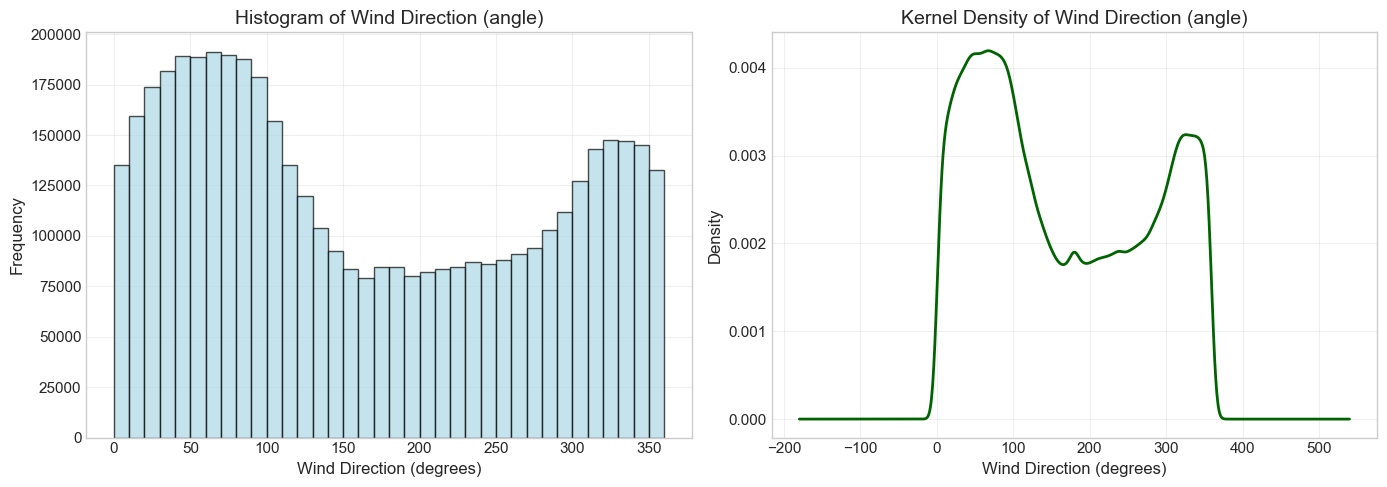

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.hist(df['angle'].dropna(), bins=36, color='lightblue', edgecolor='black', alpha=0.7)
ax1.set_title('Histogram of Wind Direction (angle)', fontsize=14)
ax1.set_xlabel('Wind Direction (degrees)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.grid(alpha=0.3)

df['angle'].dropna().plot.kde(ax=ax2, color='darkgreen', linewidth=2)
ax2.set_title('Kernel Density of Wind Direction (angle)', fontsize=14)
ax2.set_xlabel('Wind Direction (degrees)', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Q8 Answer

In [21]:
bins = [0, 90, 180, 270, 360]
labels = [0, 90, 180, 270]

df['ang_range'] = pd.cut(
    df['angle'],
    bins=bins,
    labels=labels,
    right=False,         
    include_lowest=True  
).astype('float64')       


ang_summary = df['ang_range'].describe().loc[['mean', 'std', 'min', 'max']].round(3)


print("="*40)
print("Summary Statistics of ang_range")
print("="*40)
print(ang_summary.to_string())
print("="*40)

Summary Statistics of ang_range
mean    119.135
std     107.508
min       0.000
max     270.000


Q9 Answer

County fixed effects (αₙ): Control for time-invariant characteristics of counties (long-term geographic conditions, baseline infrastructure, permanent demographic structures) that may correlate with PM2.5 and mortality.

State-by-month fixed effects (αₛₘ): Control for state-specific, time-varying factors that vary by month (state-level monthly policies, seasonal weather patterns within a state, state-specific seasonal economic activities).

Month-by-year fixed effects (αₘᵧ): Control for nationwide, time-varying shocks common to all counties in a specific month-year (national seasonal trends, macroeconomic events in a given month, cross-state climate anomalies).

Q10 Answer

Underlying Assumption of the IV Strategy
Two core assumptions:

Relevance: Wind direction (instrument) is strongly correlated with PM2.5 concentrations (endogenous variable) – satisfied if wind affects pollutant dispersion.

Exogeneity (exclusion restriction): Wind direction only impacts mortality through its effect on PM2.5, with no direct or indirect channels unrelated to PM2.5 (i.e., wind direction is uncorrelated with the error term ϵᵨₙₘᵧ).

Will the Assumption Hold with Local Point-Source Pollution?

No, the assumption is likely violated.
Reason: Local/point-source pollution within a county is often spatially concentrated. Wind direction may affect PM2.5 by dispersing local point-source emissions, but the location of these sources may correlate with unobserved factors tied to mortality.

This creates a confounding channel: wind direction’s correlation with mortality may reflect not just PM2.5 variation, but also pre-existing differences in areas near point sources. Thus, the exclusion restriction fails.

Bonus Question Analysis

Figure & Source: A bar chart from a local news site comparing monthly retail sales (Jan–Jun), with a truncated y-axis starting at $80k (instead of $0).

Flaws: Truncated axis exaggerates small sales differences (e.g., $85k vs. $90k appears 2x larger), and clashing neon colors distract from data.

Improvement: Use a full y-axis starting at $0 to reflect true proportional differences, adopt neutral monochromatic bars, and label exact values for clarity.